# **# preprocessing step**





# **importing** **libraries**

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import string
import matplotlib as plot
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from sklearn.manifold import TSNE
import pandas as pd
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


**bold text**# loading files


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/ML_FOLDER/ai-project/ml/dataset/dataset.csv")
df.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


creating index part and comment part

In [5]:
with open('/content/drive/MyDrive/ML_FOLDER/ai-project/ml/dataset/dataset.csv', 'r', encoding='utf-8') as file:
    data = file.readlines()

# Create a DataFrame with index and text columns
df = pd.DataFrame({'index': range(len(data)), 'comment': data})

# Save the new DataFrame to a new CSV file
df.to_csv('indexed_comments.csv', index=False)

In [6]:
df['comment'][255]

'"Not good as Samsung quality products, earphone should be given with the phone."\n'

In [7]:
df['lower_case'] = df['comment'].str.lower()


removing punctuations

In [8]:
df['cleaned_comment'] = df['lower_case'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

In [9]:
df.head()

,index,comment,lower_case,cleaned_comment
0,0,review\n,review\n,review\n
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...
4,4,Good\n,good\n,good\n


tokenize the sentences and apply stemming using a lambda function

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
ps = PorterStemmer()
ps = PorterStemmer()
df['tokenized_comment'] = df['lower_case'].apply(lambda x: word_tokenize(x))
df['stemmed_comment'] = df['tokenized_comment'].apply(lambda x: [ps.stem(word) for word in x])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
df.head()

,index,comment,lower_case,cleaned_comment,tokenized_comment,stemmed_comment
0,0,review\n,review\n,review\n,[review],[review]
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n,"[good, but, need, updates, and, improvements]","[good, but, need, updat, and, improv]"
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...,"[``, worst, mobile, i, have, bought, ever, ,, ...","[``, worst, mobil, i, have, bought, ever, ,, b..."
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...,"[when, i, will, get, my, 10, %, cash, back, .....","[when, i, will, get, my, 10, %, cash, back, ....."
4,4,Good\n,good\n,good\n,[good],[good]


In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
# Tokenize the sentences and apply lemmatization using lambda function
lemmatizer = WordNetLemmatizer()
df['lemmatized_comment'] = df['tokenized_comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['lemmatized_comment'] = df['lemmatized_comment'].apply(lambda x: ' '.join(x))
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,index,comment,lower_case,cleaned_comment,tokenized_comment,stemmed_comment,lemmatized_comment
0,0,review\n,review\n,review\n,[review],[review],review
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n,"[good, but, need, updates, and, improvements]","[good, but, need, updat, and, improv]",good but need update and improvement
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...,"[``, worst, mobile, i, have, bought, ever, ,, ...","[``, worst, mobil, i, have, bought, ever, ,, b...","`` worst mobile i have bought ever , battery i..."
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...,"[when, i, will, get, my, 10, %, cash, back, .....","[when, i, will, get, my, 10, %, cash, back, .....",when i will get my 10 % cash back .... it alre...
4,4,Good\n,good\n,good\n,[good],[good],good


# divide our comments to positive and negetive

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [14]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(tokens):
    scores = sid.polarity_scores(' '.join(tokens))
    return scores['compound']

df['sentiment_score'] = df['tokenized_comment'].apply(get_sentiment_score)

df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')


In [15]:
df.head()

,index,comment,lower_case,cleaned_comment,tokenized_comment,stemmed_comment,lemmatized_comment,sentiment_score,sentiment
0,0,review\n,review\n,review\n,[review],[review],review,0.0000,positive
1,1,Good but need updates and improvements\n,good but need updates and improvements\n,good but need updates and improvements\n,"[good, but, need, updates, and, improvements]","[good, but, need, updat, and, improv]",good but need update and improvement,0.5994,positive
2,2,"""Worst mobile i have bought ever, Battery is d...","""worst mobile i have bought ever, battery is d...",worst mobile i have bought ever battery is dra...,"[``, worst, mobile, i, have, bought, ever, ,, ...","[``, worst, mobil, i, have, bought, ever, ,, b...","`` worst mobile i have bought ever , battery i...",-0.8720,negative
3,3,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,when i will get my 10 cash back its already 15...,"[when, i, will, get, my, 10, %, cash, back, .....","[when, i, will, get, my, 10, %, cash, back, .....",when i will get my 10 % cash back .... it alre...,0.0000,positive
4,4,Good\n,good\n,good\n,[good],[good],good,0.4404,positive


<Axes: >

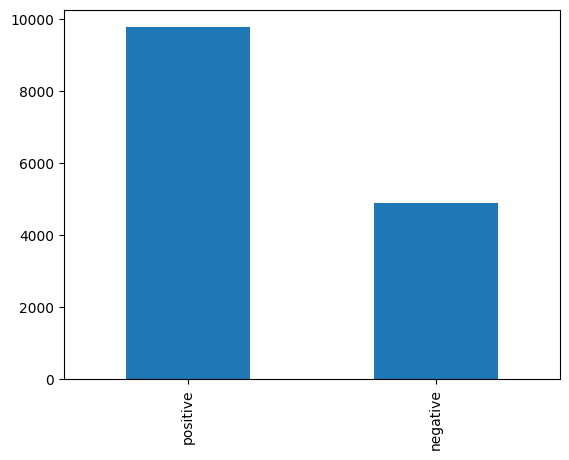

In [16]:
df['sentiment'].value_counts().plot.bar()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14676 non-null  int64  
 1   comment             14676 non-null  object 
 2   lower_case          14676 non-null  object 
 3   cleaned_comment     14676 non-null  object 
 4   tokenized_comment   14676 non-null  object 
 5   stemmed_comment     14676 non-null  object 
 6   lemmatized_comment  14676 non-null  object 
 7   sentiment_score     14676 non-null  float64
 8   sentiment           14676 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


# **splitting data to train and test sets**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_comment'], df['sentiment'], test_size = 0.3, random_state = 42)


In [19]:
print(X_train.shape)
print(X_test.shape)

(10273,)
(4403,)


# **vectorization**

# *we can use CountVectorizer or tfidf*

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

bag_of_words = pd.DataFrame(count_vectorizer.fit_transform(df['lemmatized_comment']))

print(bag_of_words)

                                                       0
0                                           (0, 9356)\t1
1        (0, 4811)\t1\n  (0, 2099)\t1\n  (0, 7327)\t1...
2        (0, 11869)\t1\n  (0, 7059)\t2\n  (0, 5165)\t...
3        (0, 5857)\t1\n  (0, 11762)\t1\n  (0, 11712)\...
4                                           (0, 4811)\t1
...                                                  ...
14671    (0, 5785)\t1\n  (0, 6470)\t1\n  (0, 10777)\t...
14672    (0, 1021)\t1\n  (0, 1599)\t1\n  (0, 5785)\t4...
14673    (0, 10824)\t1\n  (0, 1389)\t1\n  (0, 8470)\t...
14674    (0, 2099)\t1\n  (0, 5785)\t2\n  (0, 10824)\t...
14675    (0, 4811)\t1\n  (0, 2099)\t1\n  (0, 7444)\t1...

[14676 rows x 1 columns]


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
tfidf = TfidfVectorizer(encoding='utf-8',ngram_range=(1,2), max_df=1.0, min_df=10, max_features=300, norm='l2', sublinear_tf=True)

In [23]:
train_features = tfidf.fit_transform(X_train).toarray()
print(train_features.shape)
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

(10273, 300)
(4403, 300)


In [24]:
train_labels = Y_train
test_labels = Y_test

importin sk learn libraries

In [25]:
import pickle
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [26]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

# training and evaluation with naive bayse

In [27]:
mnb_prediction = mnb_classifier.predict(test_features)
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
classification_s = classification_report(train_labels, mnb_classifier.predict(train_features))
print(classification_s)
print(training_accuracy)

              precision    recall  f1-score   support

    negative       0.81      0.66      0.73      3406
    positive       0.85      0.92      0.88      6867

    accuracy                           0.84     10273
   macro avg       0.83      0.79      0.80     10273
weighted avg       0.83      0.84      0.83     10273

0.8350043804146793


training and evaluation wuth logestic regression

In [28]:
lr =  LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression()

In [29]:
lrb = lr.predict(test_features)
training_accuracy = accuracy_score(train_labels, lr.predict(train_features))
classification_s = classification_report(train_labels, lr.predict(train_features))
print(classification_s)
print(training_accuracy)

              precision    recall  f1-score   support

    negative       0.84      0.73      0.78      3406
    positive       0.87      0.93      0.90      6867

    accuracy                           0.86     10273
   macro avg       0.86      0.83      0.84     10273
weighted avg       0.86      0.86      0.86     10273

0.863720432200915


training model with SVC

In [30]:
svm_model = SGDClassifier()
svm_model.fit(train_features, train_labels)


SGDClassifier()

In [31]:

Classifier = SVC(kernel="linear")
Classifier.fit(train_features, train_labels)

y_pred = Classifier.predict(train_features)

accuracy = accuracy_score(train_labels, y_pred)*100
confusion_mat = confusion_matrix(train_labels, y_pred)

print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 86.41098023946266
Confusion Matrix
[[2472  934]
 [ 462 6405]]


# **XGBOOST CLASSIFIER**

import libraries



In [32]:
# import XGBoost
import xgboost as xgb
# import XGBClassifier
from xgboost import XGBClassifier


In [33]:
params = {
            'objective':'reg:logistic',
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':200
        }


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(train_features, train_labels_encoded)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

Testing Accuracy: 0.8553259141494436
Confusion Matrix:
[[1130  363]
 [ 274 2636]]


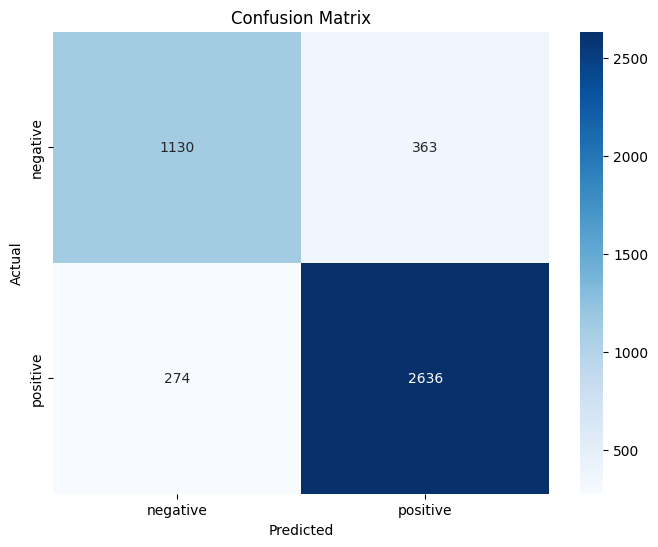

F1 Score: 0.854193140233202


In [34]:
test_predictions_encoded = xgb_clf.predict(test_features)
# Invert transform the predicted labels to get them back to the original string format
test_predictions_decoded = label_encoder.inverse_transform(test_predictions_encoded)
test_accuracy = accuracy_score(test_labels, test_predictions_decoded)
print("Testing Accuracy:", test_accuracy)
conf_matrix = confusion_matrix(test_labels, test_predictions_decoded)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
f1 = f1_score(test_labels, test_predictions_decoded, average='weighted')
print("F1 Score:", f1)

# change parameters and see the result!

In [35]:
params = {
            'objective':'reg:logistic',
            'max_depth': 4,
            #changed to 4 from 7
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
            #number of trees reduced to 100 from 200
        }


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(train_features, train_labels_encoded)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
test_predictions_encoded = xgb_clf.predict(test_features)
# Invert transform the predicted labels to get them back to the original string format
test_predictions_decoded = label_encoder.inverse_transform(test_predictions_encoded)
test_accuracy1 = accuracy_score(test_labels, test_predictions_decoded)
l = test_accuracy1 - test_accuracy
print(test_accuracy1)
print(l*100, "percent improvemnt")

0.8660004542357483
1.0674540086304751 percent improvemnt


# **CART (Classification and Regression Trees)**

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
cart_classifier = DecisionTreeClassifier()
cart_classifier.fit(train_features, train_labels)

# Make predictions
predictions = cart_classifier.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8105836929366341


Accuracy: 0.8105836929366341
F1 Score: 0.810521699968676


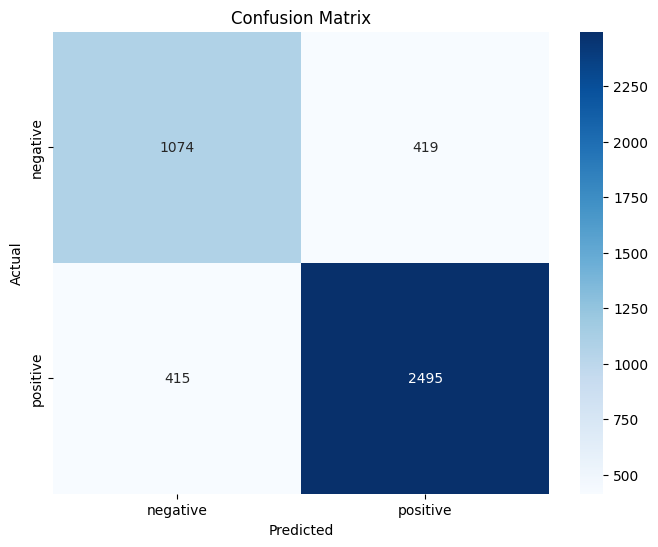

In [39]:
accuracy = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions, average='weighted')
conf_matrix = confusion_matrix(test_labels, predictions)

# Print accuracy and F1 score
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

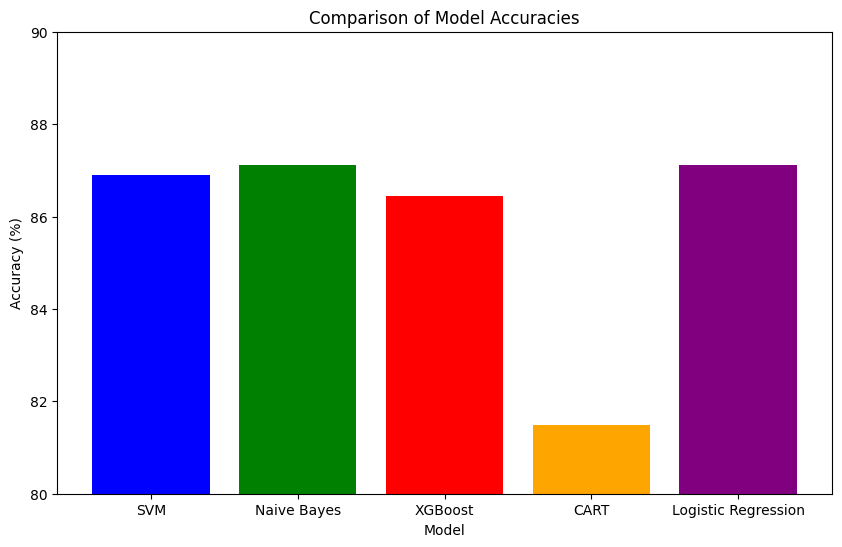

In [40]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Naive Bayes', 'XGBoost', 'CART', 'Logistic Regression']

# Accuracy values
accuracies = [86.88795872675946, 87.11184658814368, 86.44106291165115, 81.48989325459913, 87.11184658814368]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(80, 90)  # Set y-axis limits
plt.show()

**we can see logistic regression is the best of all in ml classifier models**